In [1]:
# Import commonly used libraries
import pandas
import numpy
import scipy.stats
import pandasql
from ggplot import *
%matplotlib inline

In [2]:
# Create a DataFrame to store the turnstile and weather data.
allData = pandas.read_csv ("turnstile_data_master_with_weather.csv")
allData.rename(columns = lambda x: x.replace(' ', '_').lower(), inplace=True)

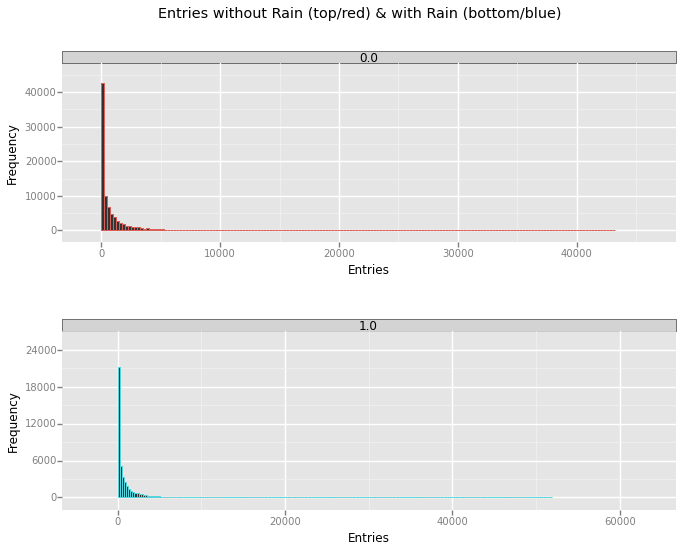

<ggplot: (28792713)>

In [6]:
# Produce histograms showing the Entries per hour on non-rainy and rainy days.
ggplot(allData, aes(x='entriesn_hourly', color='rain')) + \
    geom_histogram(binwidth=250) + \
    facet_wrap('rain') + \
    ggtitle('Entries without Rain (top/red) & with Rain (bottom/blue)') + \
    xlab('Entries') + ylab('Frequency')


In [4]:
avgRidersPerHour = pandasql.sqldf('SELECT hour, AVG(entriesn_hourly) AS avg, \
rain FROM allData GROUP BY hour, rain ORDER BY hour;', globals())

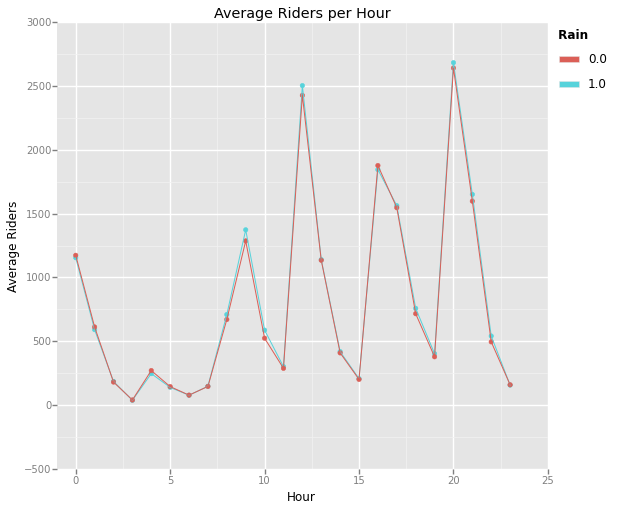

<ggplot: (4011412)>

In [5]:
ggplot(avgRidersPerHour, aes(y='avg', x='hour', color='rain')) + \
    geom_point() + geom_line() + \
    ggtitle('Average Riders per Hour') + xlim(-1,25) + \
    xlab('Hour') + ylab('Average Riders')